In [3]:
from urllib.request import urlretrieve
import pandas as pd
import black
import matplotlib.pyplot as plt

In [4]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x23c8a3dbca0>)

In [5]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [6]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [7]:
type(covid_df)

pandas.core.frame.DataFrame

In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [9]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [10]:
covid_df.shape

(248, 4)

In [11]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [12]:
covid_df.at[200,'new_cases']

231.0

In [13]:
covid_df.at[200,'new_tests']

27569.0

In [14]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [15]:
covid_df.new_tests

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
243    53541.0
244    42583.0
245    54395.0
246        NaN
247        NaN
Name: new_tests, Length: 248, dtype: float64

In [16]:
covid_df[['date','new_cases','new_tests']]

,date,new_cases,new_tests
0,2019-12-31,0.0,NaN
1,2020-01-01,0.0,NaN
2,2020-01-02,0.0,NaN
3,2020-01-03,0.0,NaN
4,2020-01-04,0.0,NaN
...,...,...,...
243,2020-08-30,1444.0,53541.0
244,2020-08-31,1365.0,42583.0
245,2020-09-01,996.0,54395.0
246,2020-09-02,975.0,NaN


In [17]:
covid_df.loc[200]

date          2020-07-18
new_cases          231.0
new_deaths          11.0
new_tests        27569.0
Name: 200, dtype: object

In [18]:
covid_df.iloc[200]

date          2020-07-18
new_cases          231.0
new_deaths          11.0
new_tests        27569.0
Name: 200, dtype: object

In [19]:
covid_df.new_tests.first_valid_index()

111

In [20]:
new_cases_invalid_tests = covid_df.loc[:111,['new_cases']]
new_cases_invalid_tests

,new_cases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
107,2667.0
108,3786.0
109,3493.0
110,3491.0


In [21]:
covid_df.loc[108:111]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0


In [22]:
covid_df.sample(n=10)

,date,new_cases,new_deaths,new_tests
65,2020-03-05,587.0,27.0,NaN
244,2020-08-31,1365.0,4.0,42583.0
155,2020-06-03,318.0,55.0,20035.0
228,2020-08-15,574.0,3.0,25937.0
45,2020-02-14,0.0,0.0,NaN
20,2020-01-20,0.0,0.0,NaN
149,2020-05-28,584.0,117.0,39838.0
130,2020-05-09,1327.0,243.0,36091.0
98,2020-04-07,3599.0,636.0,NaN
177,2020-06-25,577.0,-31.0,29421.0


In [23]:
total_cases = covid_df.new_cases.sum()
total_cases

271515.0

In [24]:
total_deaths = covid_df.new_deaths.sum()
total_deaths

35497.0

In [25]:
mortality_rate = (total_deaths/total_cases)*100
mortality_rate

13.073679170579894

In [26]:
initial_valid_tests = 935310
total_tests = initial_valid_tests + covid_df.new_tests.sum()
total_tests

5214766.0

In [27]:
positivity_rate = (total_cases/total_tests)*100
positivity_rate

5.206657403227681

In [28]:
high_daily_covid_cases = covid_df.new_cases > 1000
high_daily_covid_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [29]:
covid_df[high_daily_covid_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [30]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [31]:
high_positivity_rate = covid_df[covid_df.new_cases / covid_df.new_tests > (positivity_rate/100)]
high_positivity_rate

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


<AxesSubplot:>

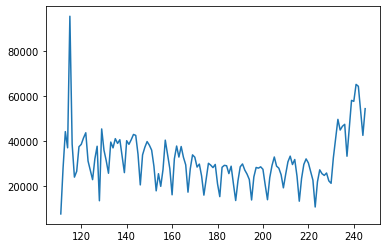

In [32]:
covid_df.new_tests.plot()

<AxesSubplot:>

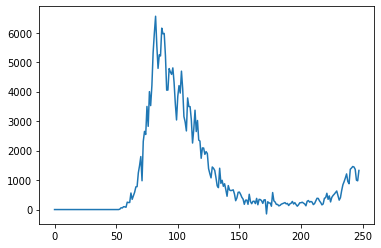

In [33]:
covid_df.new_cases.plot()

In [34]:
covid_df['positivity_rate'] = covid_df.new_cases / covid_df.new_tests

In [35]:
covid_df.loc[:111,['positivity_rate']] = None

In [36]:
covid_df.drop(columns=['positivity_rate'], inplace=True)

In [37]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


<AxesSubplot:>

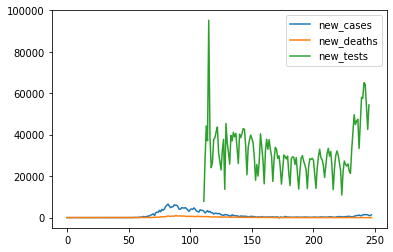

In [38]:
covid_df.plot()

In [39]:
covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [40]:
covid_df.sort_values('new_cases').head(10)


,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [41]:
covid_df.loc[165:175,['date','new_cases']]

,date,new_cases
165,2020-06-13,163.0
166,2020-06-14,346.0
167,2020-06-15,338.0
168,2020-06-16,301.0
169,2020-06-17,210.0
170,2020-06-18,328.0
171,2020-06-19,331.0
172,2020-06-20,-148.0
173,2020-06-21,264.0
174,2020-06-22,224.0


In [42]:
covid_df.loc[165:175,['new_cases']].mean()

new_cases    234.363636
dtype: float64

In [43]:
covid_df.loc[172,['new_cases']] = 234

In [44]:
covid_df.loc[165:175,['new_cases']]

,new_cases
165,163.0
166,346.0
167,338.0
168,301.0
169,210.0
170,328.0
171,331.0
172,234.0
173,264.0
174,224.0


In [45]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [46]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [47]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [48]:
covid_df_may[['new_cases','new_tests','new_deaths']].sum()

new_cases       29073.0
new_tests     1078720.0
new_deaths       5658.0
dtype: float64

In [49]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [50]:
covid_df.new_cases.mean()

1096.358870967742

<AxesSubplot:>

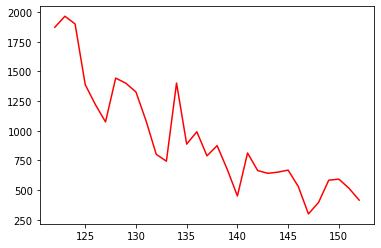

In [51]:
covid_df_may['new_cases'].plot(color='r')

In [52]:
weekday_new_cases_may = covid_df_may.groupby('weekday')['new_cases'].mean()
weekday_new_cases_may

weekday
0     849.25
1     679.00
2     921.75
3     895.25
4    1100.00
5    1049.80
6     988.60
Name: new_cases, dtype: float64

In [53]:
weekday_new_cases = covid_df.groupby('weekday')['new_cases'].mean()
weekday_new_cases

weekday
0    1109.142857
1     918.638889
2     927.305556
3    1095.666667
4    1189.714286
5    1196.714286
6    1247.257143
Name: new_cases, dtype: float64

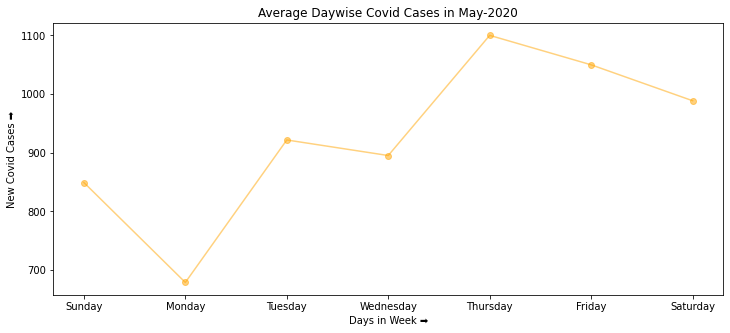

In [54]:
weekday_new_cases_may = covid_df_may.groupby('weekday')['new_cases'].mean()

weekdays_name = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

plt.figure(figsize=(12,5))
plt.plot(weekdays_name,weekday_new_cases_may,color='orange',marker='o',alpha=0.5,ls='-',mec='orange')
plt.xlabel('Days in Week ➡️')
plt.ylabel('New Covid Cases ➡️')
plt.title('Average Daywise Covid Cases in May-2020')
plt.show()

In [55]:
new_cases_monthly = covid_df.groupby('month')['new_cases'].mean()
new_cases_monthly

month
1        0.096774
2       30.517241
3     3253.258065
4     3395.066667
5      937.838710
6      271.800000
7      216.838710
8      679.354839
9     1099.000000
12       0.000000
Name: new_cases, dtype: float64

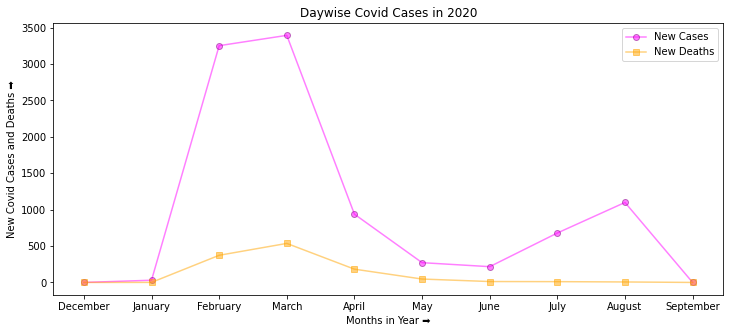

In [56]:
new_cases_monthly = covid_df.groupby('month')[['new_cases']].mean()
new_deaths_monthly = covid_df.groupby('month')[['new_deaths']].mean()

Month_name = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

plt.figure(figsize=(12,5))
plt.plot(Month_name, new_cases_monthly,color='magenta',marker='o',alpha=0.5,ls='-',mec='purple')
plt.plot(Month_name, new_deaths_monthly,color='orange',marker='s',alpha=0.5,ls='-',mec='orange')
plt.xlabel('Months in Year ➡️')
plt.ylabel('New Covid Cases and Deaths ➡️')
plt.legend(['New Cases', 'New Deaths'])
plt.title('Daywise Covid Cases in 2020')
plt.show()

In [57]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [58]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv','locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x23c8dadd100>)

In [59]:
locations_df = pd.read_csv('locations.csv')

In [60]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [61]:
locations_df[locations_df.location == 'India']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
90,India,Asia,1.380004e+09,69.66,0.53,6426.674


In [62]:
locations_df['life_expectancy'].idxmax()

127

In [63]:
locations_df.max()

C:\Users\SHANTANU\AppData\Local\Temp/ipykernel_36720/1349498942.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  locations_df.max()


location                          Zimbabwe
population                    7794798729.0
life_expectancy                      86.75
hospital_beds_per_thousand            13.8
gdp_per_capita                    116935.6
dtype: object

In [64]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [65]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_valid_tests

In [66]:
covid_df['location'] = 'Italy'
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267235.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268600.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269596.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270571.0,35491.0,NaN,Italy


In [67]:
merged_df = covid_df.merge(locations_df, on='location')
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267235.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268600.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269596.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270571.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [68]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [69]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [70]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267235.0,1.0,35473.0,53541.0,5117788.0,4419.896137,586.700753,84644.943252
244,2020-08-31,1365.0,268600.0,4.0,35477.0,42583.0,5160371.0,4442.472365,586.766910,85349.238862
245,2020-09-01,996.0,269596.0,6.0,35483.0,54395.0,5214766.0,4458.945568,586.866146,86248.897403
246,2020-09-02,975.0,270571.0,8.0,35491.0,NaN,NaN,4475.071445,586.998461,NaN


In [71]:
result_df.to_csv('result.csv',index=None)

<AxesSubplot:>

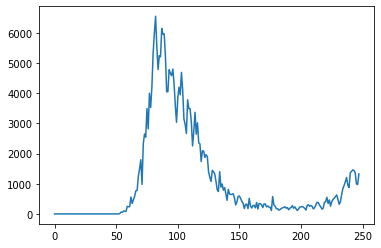

In [72]:
result_df.new_cases.plot()

In [73]:
result_df.set_index('date',inplace=True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267235.0,1.0,35473.0,53541.0,5117788.0,4419.896137,586.700753,84644.943252
2020-08-31,1365.0,268600.0,4.0,35477.0,42583.0,5160371.0,4442.472365,586.766910,85349.238862
2020-09-01,996.0,269596.0,6.0,35483.0,54395.0,5214766.0,4458.945568,586.866146,86248.897403


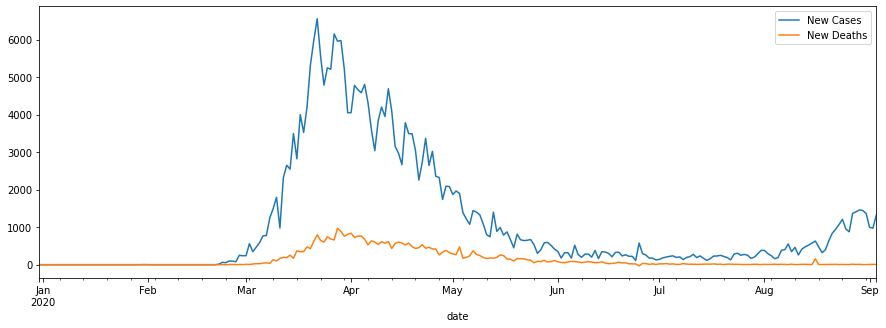

In [74]:
result_df.new_cases.plot(figsize=(15,5))
result_df.new_deaths.plot(figsize=(15,5))
plt.legend(['New Cases','New Deaths'])

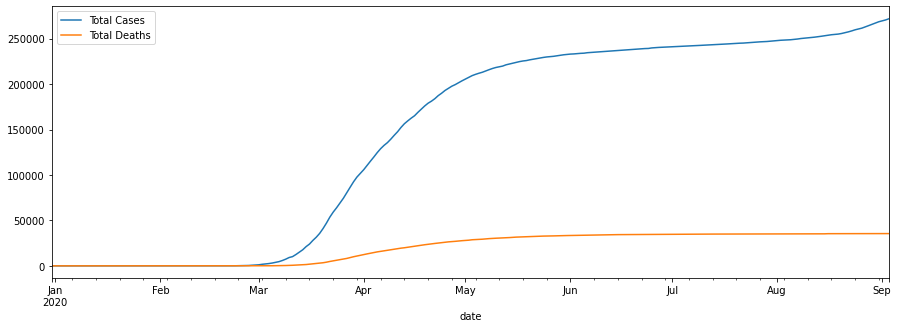

In [75]:
result_df.total_cases.plot(figsize=(15,5))
result_df.total_deaths.plot(figsize=(15,5))
plt.legend(['Total Cases','Total Deaths'])

In [76]:
death_rate = result_df.total_deaths/result_df.total_cases

<AxesSubplot:title={'center':'Daily Death Rate'}, xlabel='date'>

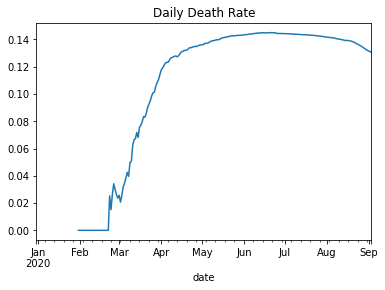

In [77]:
death_rate.plot(title='Daily Death Rate')

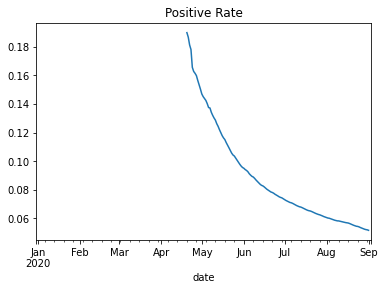

In [78]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');